In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# File path relative to your notebook
file_path = 'data/phl_exoplanet_catalog_2019.csv'

# Load the CSV
df = pd.read_csv(file_path)

# Output basic info
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape of dataset: (4048, 112)


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [2]:
# 1. Basic info about data types and missing values
print("Dataset Info:")
df.info()

print("\nMissing values count per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))  # top 20 columns with most missing data

# 2. Summary statistics of numeric columns
print("\nSummary statistics:")
print(df.describe())

# 3. Percentage of missing data per column (optional, for better visualization)
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nColumns with more than 30% missing data:")
print(missing_percent[missing_percent > 30].sort_values(ascending=False))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB

Missing values count per column:
P_ATMOSPHERE              4048
P_ALT_NAMES               4048
P_DETECTION_RADIUS        4048
P_GEO_ALBEDO              4048
P_DETECTION_MASS          4048
S_MAGNETIC_FIELD          4048
S_DISC                    4048
P_TEMP_MEASURED           4043
P_GEO_ALBEDO_ERROR_MIN    4043
P_GEO_ALBEDO_ERROR_MAX    4043
P_TPERI_ERROR_MAX         3576
P_TPERI_ERROR_MIN         3576
P_TPERI                   3567
P_OMEGA_ERROR_MIN         3355
P_OMEGA_ERROR_MAX         3355
P_ESCAPE                  3342
P_POTENTIAL               3342
P_DENSITY                 3342
P_GRAVITY                 3342
P_OMEGA                   3302
dtype: int64

Summary statistics:
       P_STATUS        P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
count    4048.0   1598.000000       1

In [3]:
# Step 1: Drop columns with >=50% missing values
threshold = len(df) * 0.5
df_clean = df.dropna(thresh=threshold, axis=1)

# Step 2: Select important columns for habitability analysis (adjust as needed)
important_cols = ['P_NAME', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS',
                  'P_TEMP_EQUIL', 'S_TEMPERATURE', 'P_FLUX', 'P_HABITABLE']

# Keep only these columns if present
df_clean = df_clean[[col for col in important_cols if col in df_clean.columns]]

# Step 3: Fill missing numeric values with median
for col in df_clean.columns:
    if df_clean[col].dtype in ['float64', 'int64']:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)

# Step 4: Drop rows missing critical data (planet name, radius)
df_clean = df_clean.dropna(subset=['P_NAME', 'P_RADIUS'])

print("Cleaned dataset shape:", df_clean.shape)
print(df_clean.head())


Cleaned dataset shape: (4048, 8)
       P_NAME  P_RADIUS    P_PERIOD  P_SEMI_MAJOR_AXIS  P_TEMP_EQUIL  \
0    11 Com b   2.33168   326.03000               1.29     799.44963   
1    11 UMi b   2.33168   516.21997               1.53     819.07569   
2    14 And b   2.33168   185.84000               0.83     772.30746   
3    14 Her b   2.33168  1773.40000               2.93     131.38424   
4  16 Cyg B b   2.33168   798.50000               1.66     202.22783   

   S_TEMPERATURE      P_FLUX  P_HABITABLE  
0         4742.0  101.011410            0  
1         4213.0  107.351180            0  
2         4813.0   84.446427            0  
3         5338.0    0.078887            0  
4         5750.0    0.618972            0  


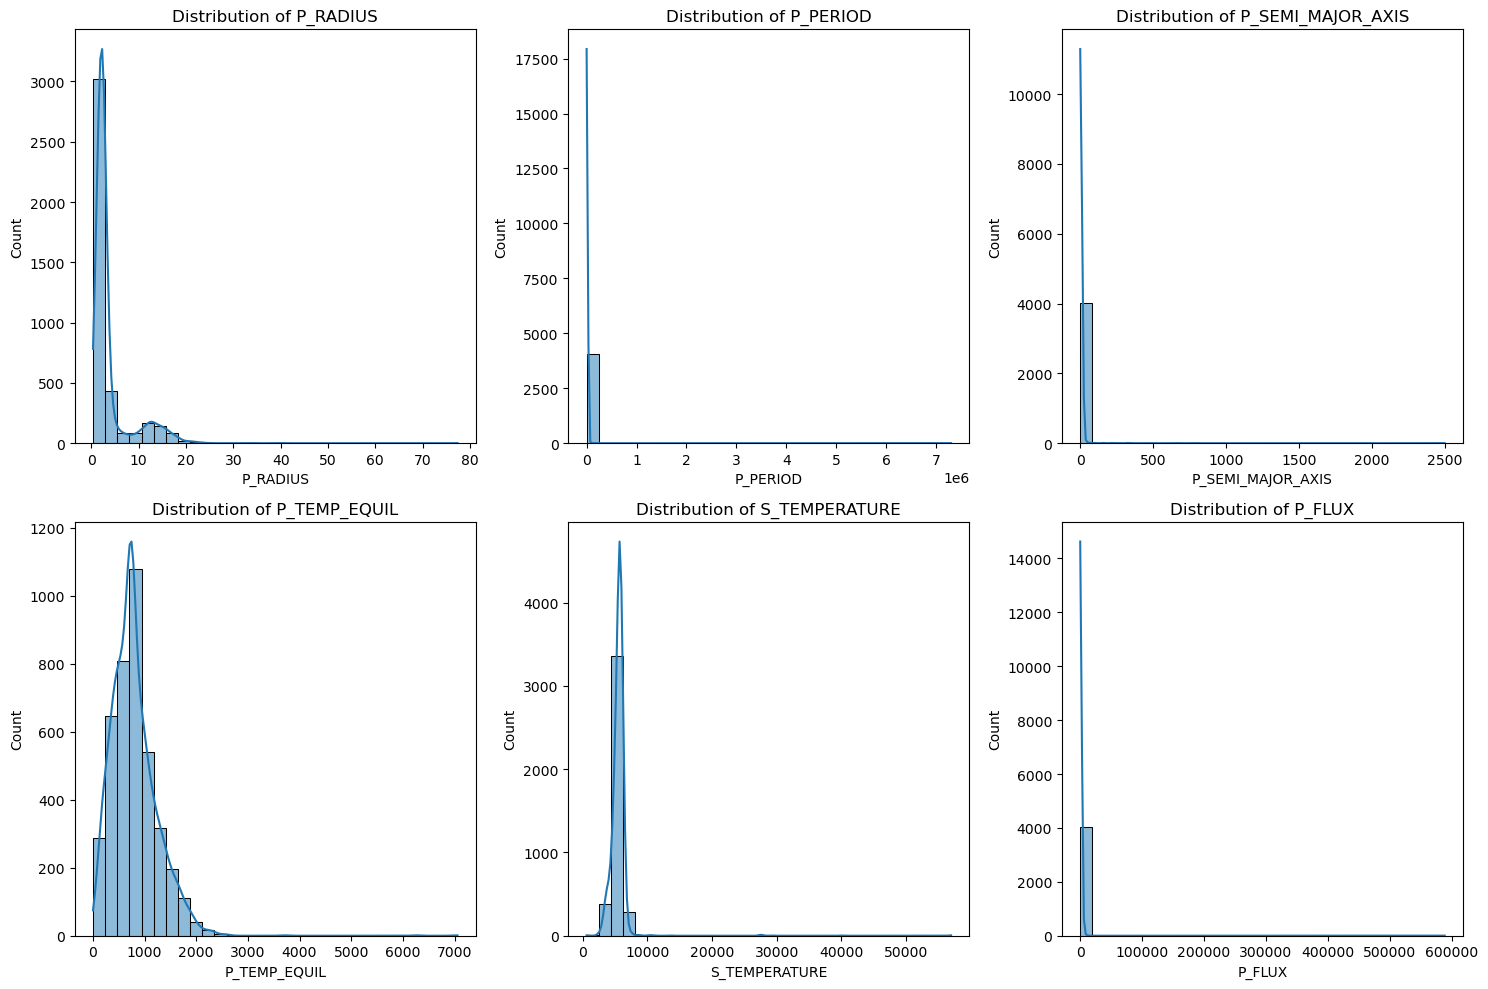

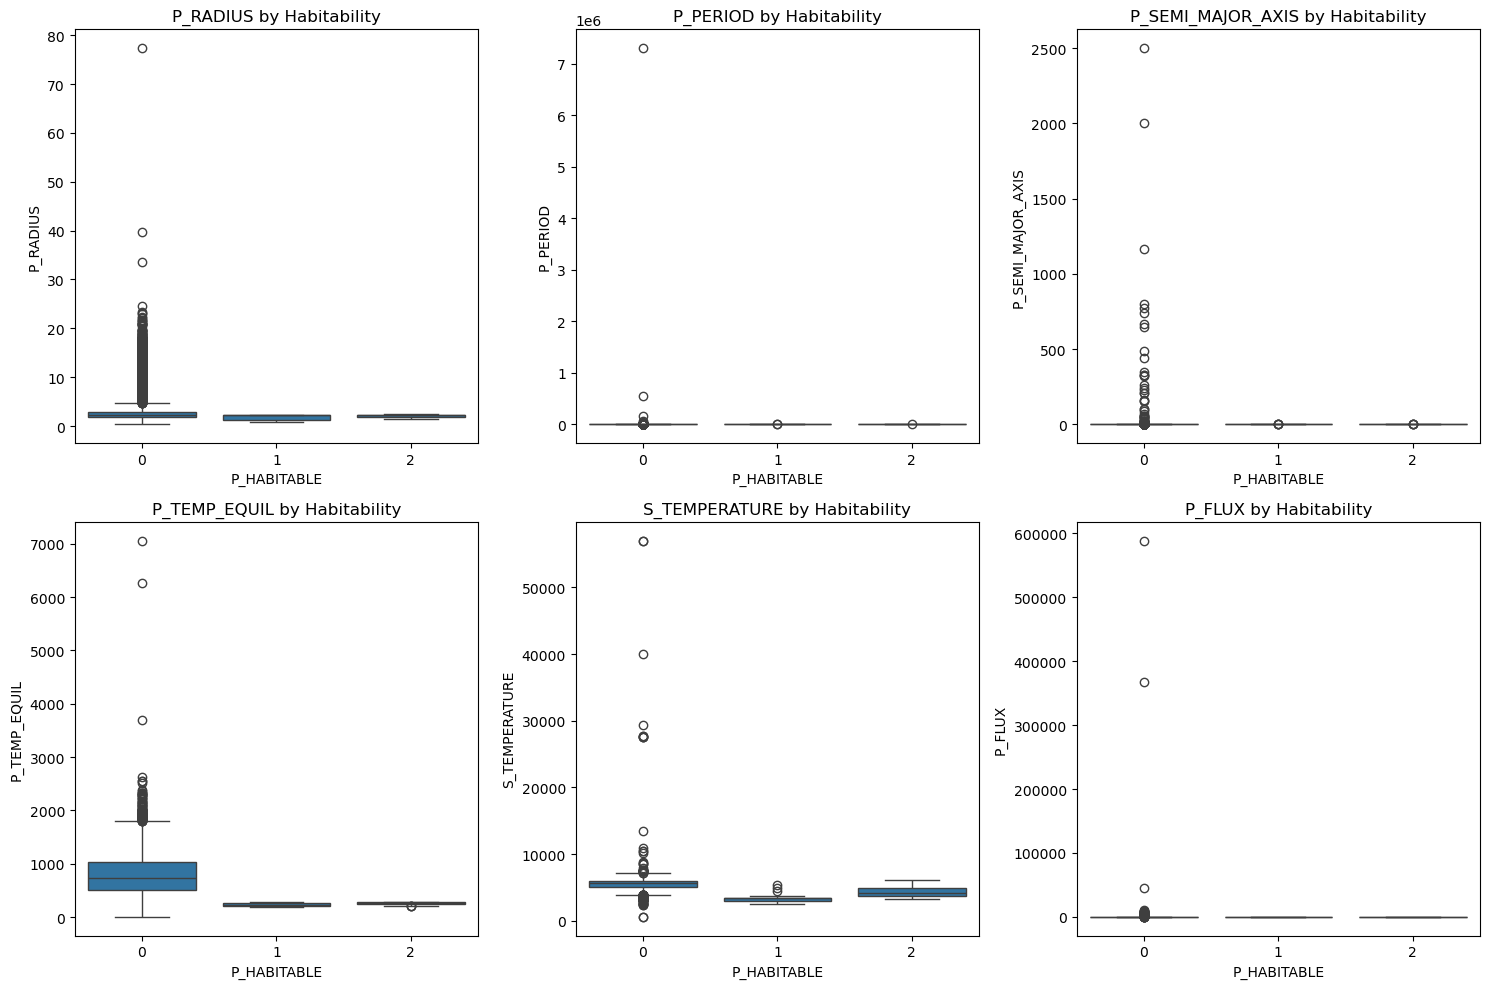

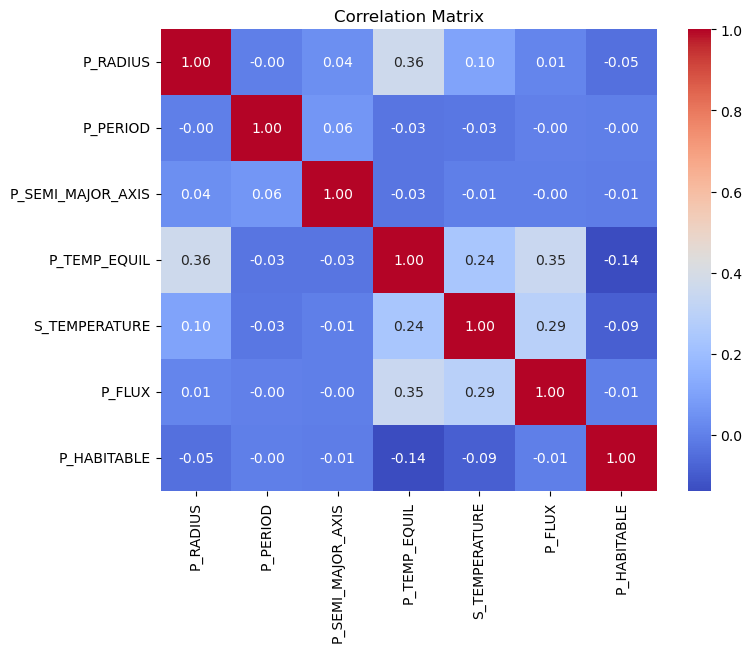

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of key numeric features
features = ['P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_TEMP_EQUIL', 'S_TEMPERATURE', 'P_FLUX']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_clean[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Compare features by habitability (0 = not habitable, 1 = habitable)
plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='P_HABITABLE', y=feature, data=df_clean)
    plt.title(f'{feature} by Habitability')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_clean.drop(['P_NAME', 'P_HABITABLE'], axis=1)
y = df_clean['P_HABITABLE']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred = logreg.predict(X_test_scaled)

# Evaluation
print("🔍 Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


🔍 Logistic Regression Results:
[[802   1   0]
 [  4   0   0]
 [  3   0   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       803
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3

    accuracy                           0.99       810
   macro avg       0.33      0.33      0.33       810
weighted avg       0.98      0.99      0.99       810

Accuracy: 0.9901234567901235


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("🌳 Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("👥 K-Nearest Neighbors Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


🌳 Random Forest Results:
[[802   0   1]
 [  2   0   2]
 [  2   0   1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       0.00      0.00      0.00         4
           2       0.25      0.33      0.29         3

    accuracy                           0.99       810
   macro avg       0.42      0.44      0.43       810
weighted avg       0.99      0.99      0.99       810

Accuracy: 0.991358024691358
👥 K-Nearest Neighbors Results:
[[799   2   2]
 [  3   1   0]
 [  2   0   1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       803
           1       0.33      0.25      0.29         4
           2       0.33      0.33      0.33         3

    accuracy                           0.99       810
   macro avg       0.55      0.53      0.54       810
weighted avg       0.99      0.99      0.99       810

Accuracy: 0.9888888888888889


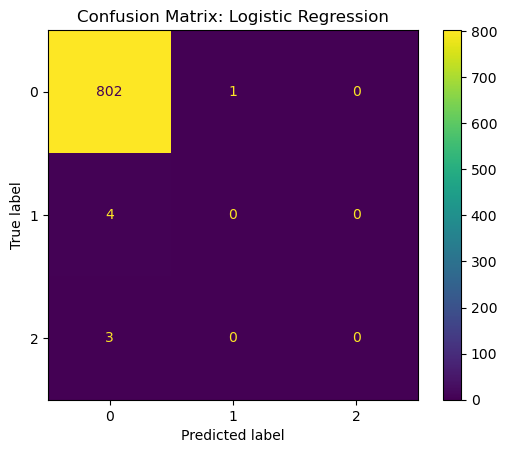

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


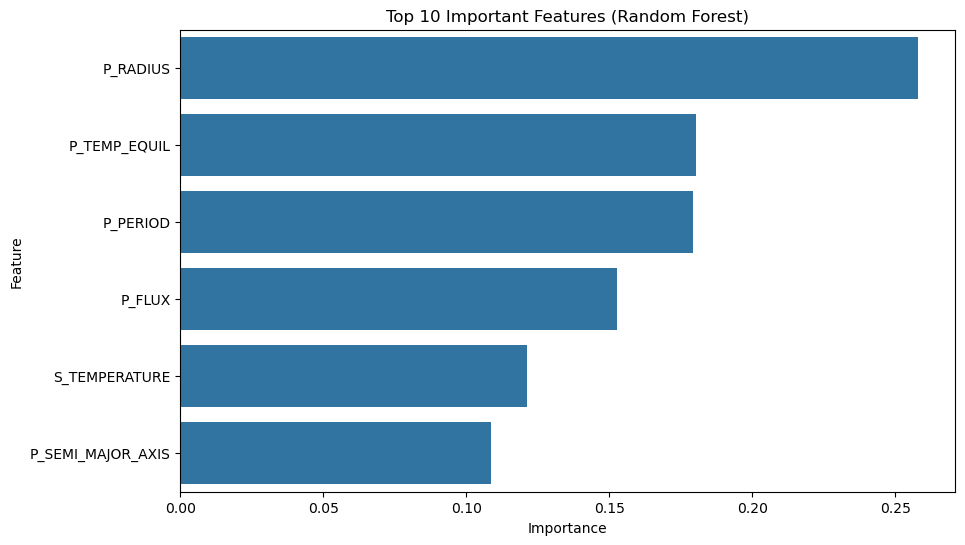

In [11]:
import pandas as pd
import numpy as np

feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.show()


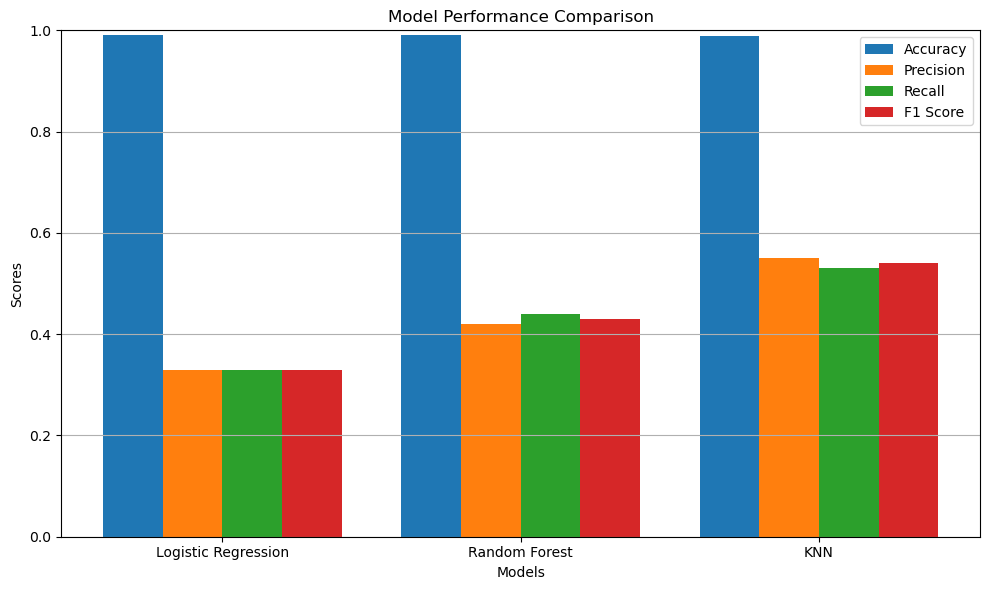

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracy = [0.9901, 0.9913, 0.9888]
precision = [0.33, 0.42, 0.55]
recall = [0.33, 0.44, 0.53]
f1 = [0.33, 0.43, 0.54]

# Set up the bar positions
x = np.arange(len(models))
width = 0.2

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Labels and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
